In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
font = {"family":"AppleGothic"}
matplotlib.rc('font', **font)
% matplotlib inline

In [2]:
def f(x):
    return(100 *  (x[1][0] - x[0][0] ** 2) ** 2 + (1 - x[0][0]) ** 2)

def grad_f(x):
    return(np.array([[400 * x[0][0] ** 3 - 400 * x[0][0] * x[1][0] + 2 * x[0][0] - 2], [200 * (x[1][0] - x[0][0] ** 2)]]))

def hessian_f(x):
    return(np.array([[1200 * x[0][0] ** 2 - 400 * x[1][0] + 2, -400 * x[0][0]], [-400 * x[0][0], 200]]))

In [3]:
def back_track(x, alpha, c, d, rho):
    while True:
        if f(x + alpha * d) <= f(x) + c * alpha * grad_f(x).T @ d:
            return alpha
        alpha *= rho

In [4]:
def gradient_descent(x_0, alpha, c, rho, n_itr):
    xs = np.array([x_0])
    for k in range(n_itr):
        d = -1 * grad_f(xs[k])
        xs = np.append(xs, [xs[k] + back_track(xs[k], alpha, c, d, rho) * d], axis = 0)
    return xs

def newton_method(x_0, n_itr):
    xs = np.array([x_0])
    for k in range(n_itr):
        d = -1 * np.linalg.inv(hessian_f(xs[k])) @ grad_f(xs[k])
        xs = np.append(xs, [xs[k] + d], axis = 0)
    return xs

def quasi_newton_method(x_0, H, alpha, c, rho ,n_itr):
    xs = np.array([x_0])
    for k in range(n_itr):
        d = -1 * H @ grad_f(xs[k])
        xs = np.append(xs, [xs[k] + back_track(xs[k], alpha, c, d, rho) * d], axis = 0)
        s = xs[k + 1] - xs[k]
        y = grad_f(xs[k + 1]) - grad_f(xs[k])
        H = (np.identity(2) - (s @ y.T) / (y.T @ s)) @ H @ (np.identity(2) - (y @ s.T) / (y.T @ s)) + (s @ s.T) / (s.T @ y)
    return xs

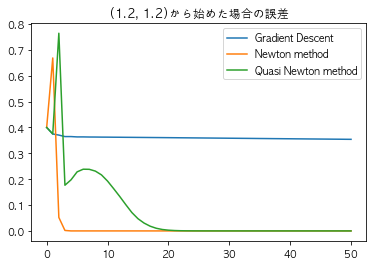

In [5]:
gradient_transition = gradient_descent(np.array([[1.2], [1.2]]), 0.5, 0.1, 0.8, 50)
newton_transition = newton_method(np.array([[1.2], [1.2]]), 50)
quasi_newton_transition = quasi_newton_method(np.array([[1.2], [1.2]]), np.array([[1, 0], [0, 1]]),0.5, 0.1, 0.8, 50)

optimum_point = np.array([[1], [1]])
def error(v):
    return np.linalg.norm(v - optimum_point)

cnt = np.arange(51)
plt.plot(cnt, np.apply_along_axis(error, 1, gradient_transition).flatten(), label='Gradient Descent')
plt.plot(cnt, np.apply_along_axis(error, 1, newton_transition).flatten(), label='Newton method')
plt.plot(cnt, np.apply_along_axis(error, 1, quasi_newton_transition).flatten(), label='Quasi Newton method')
plt.legend()
plt.title('(1.2, 1.2)から始めた場合の誤差')
plt.xlabel('trial (k)')
plt.ylabel('error')
plt.show()

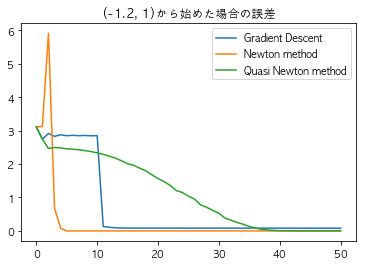

In [6]:
gradient_transition = gradient_descent(np.array([[-1.2], [1.]]), 0.5, 0.1, 0.8, 50)
newton_transition = newton_method(np.array([[-1.2], [1.]]), 50)
quasi_newton_transition = quasi_newton_method(np.array([[-1.2], [1.]]), np.array([[1, 0], [0, 1]]),0.5, 0.1, 0.8, 50)

optimum_point = np.array([[1], [1]])
def error(v):
    return np.linalg.norm(v - optimum_point)

cnt = np.arange(51)
plt.plot(cnt, np.apply_along_axis(error, 1, gradient_transition).flatten(), label='Gradient Descent')
plt.plot(cnt, np.apply_along_axis(error, 1, newton_transition).flatten(), label='Newton method')
plt.plot(cnt, np.apply_along_axis(error, 1, quasi_newton_transition).flatten(), label='Quasi Newton method')
plt.legend()
plt.title('(-1.2, 1)から始めた場合の誤差')
plt.xlabel('trial (k)')
plt.ylabel('error')
plt.show()